In [1]:
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_histogram
import statsmodels.formula.api as smf

## Load Data

In [2]:
cmv = pd.read_excel("data/cmv.xlsx")
cmv.head()

,ID,age,prior.radiation,aKIRs,cmv,donor_negative,donor_positive
0,1,61,0,1,1,recipient_positive,NaN
1,2,62,1,5,0,recipient_negative,NaN
2,3,63,0,3,0,NaN,recipient_positive
3,4,33,1,2,0,recipient_positive,NaN
4,5,54,0,6,0,NaN,recipient_positive


## Filter Data

In [3]:
cmv_subset = cmv.loc[cmv["age"] > 65]

## Save Data

In [4]:
cmv_subset.to_excel("data/cmv_subset-python-jupyter.xlsx")

## Tidy Data

In [5]:
cmv.columns

Index(['ID', 'age', 'prior.radiation', 'aKIRs', 'cmv', 'donor_negative',
       'donor_positive'],
      dtype='object')

In [6]:
cmv_tidy = (
    cmv
    .melt(
        id_vars=["ID", "age", "prior.radiation", "aKIRs", "cmv"],
        var_name='donor_status',
        value_name="recipient_status"
    )
)
cmv_tidy.head()

,ID,age,prior.radiation,aKIRs,cmv,donor_status,recipient_status
0,1,61,0,1,1,donor_negative,recipient_positive
1,2,62,1,5,0,donor_negative,recipient_negative
2,3,63,0,3,0,donor_negative,NaN
3,4,33,1,2,0,donor_negative,recipient_positive
4,5,54,0,6,0,donor_negative,NaN


## Plot Data

/home/dan/git/hub/rstatsnyc-2023-quarto/venv/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 7'. Pick better value with 'binwidth'.


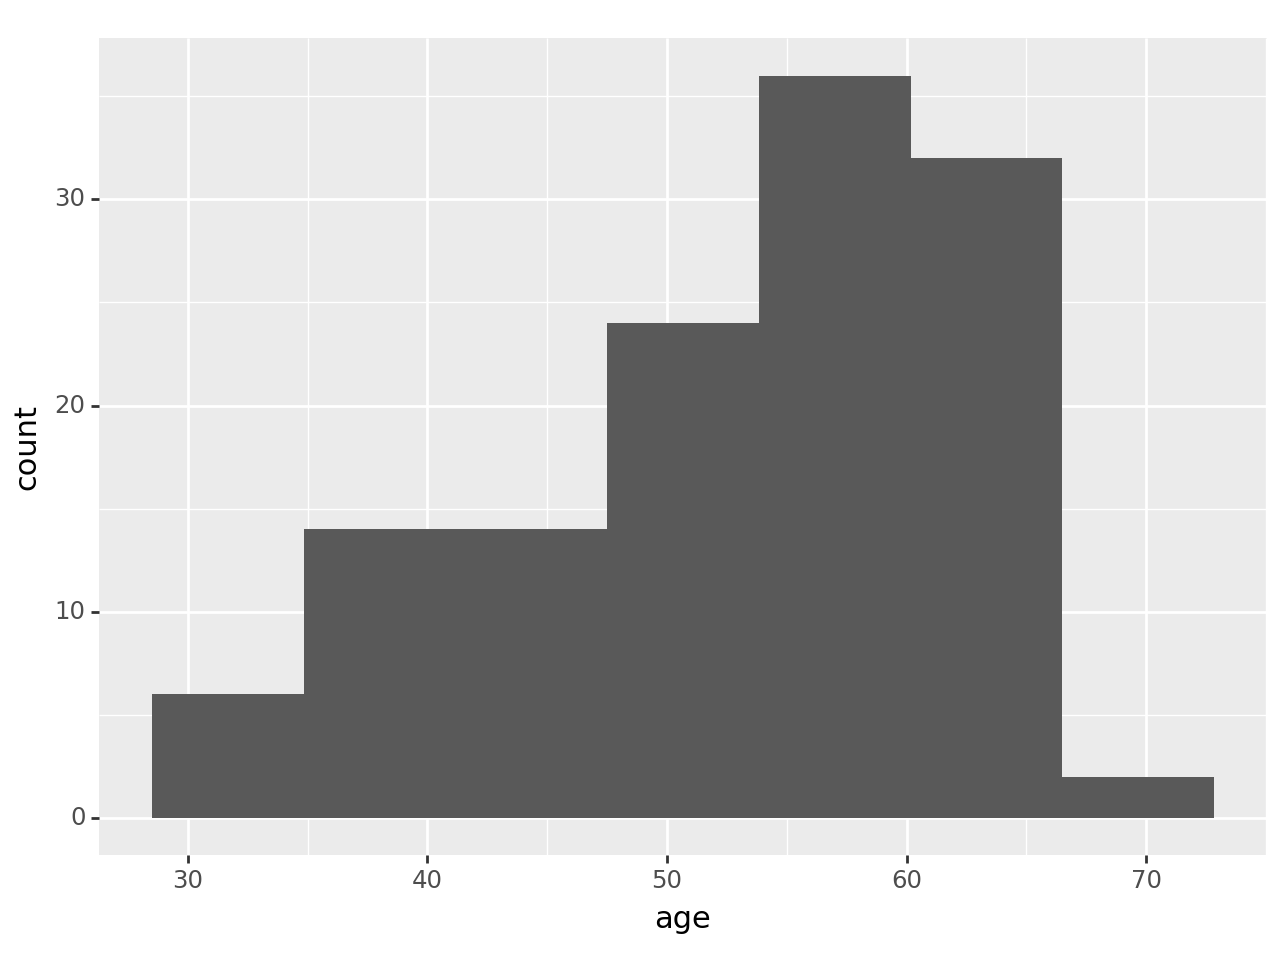

<Figure Size: (640 x 480)>

In [7]:
ggplot(cmv_tidy, aes(x="age")) + geom_histogram()

## Fit a Model

In [8]:
cmv_tidy = cmv_tidy.rename(
    columns={"prior.radiation":"prior_radiation"}
)

res = (
    smf.logit(formula="cmv ~ age + prior_radiation + donor_status", data=cmv_tidy)
    .fit()
)
res.summary()

Optimization terminated successfully.
         Current function value: 0.666972
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    cmv   No. Observations:                  128
Model:                          Logit   Df Residuals:                      124
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Jul 2023   Pseudo R-squ.:                 0.01257
Time:                        13:18:53   Log-Likelihood:                -85.372
converged:                       True   LL-Null:                       -86.459
Covariance Type:            nonrobust   LLR p-value:                    0.5371
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.6809      1.186     -0.574      0.566      -3.005       1.644
donor_status[T.donor_positive]  -4.29e-17      0.363  -1.18e-16      1.000      -0.711       0.711
age                                0.0077      0.021      0.360      0.719      -0.034       0.049
prior_radiation                   -0.6420      0.555     -1.156      0.248      -1.730       0.446
==================================================================================================
"""